In [205]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import string
import emoji
import nltk
from textblob import TextBlob
nltk.download('words')
words = set(nltk.corpus.words.words())
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC, SVC
from nltk.classify import NaiveBayesClassifier, MaxentClassifier, SklearnClassifier

# Global Parameters
#stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package words to /Users/jtangesq/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [206]:
df = pd.read_csv('../Resources/covid_vaccine_090721.csv',encoding = 'ISO-8859-1') #Dataset from Twitter API
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,NSW Multicultural Health Communication Service,NaN,Official account for NSW Multicultural Health ...,2018-08-20 02:00:05,1277,243,2311,True,2021-09-06 23:55:48,âPlease get vaccinated. Take COVID seriously...,NaN,TweetDeck,False
1,Climate Detective,NaN,Physicist (MA & PhD) & socialist exploring cli...,2020-11-07 17:03:33,94,155,354,False,2021-09-06 23:46:16,@apsmunro That is a lot more than the risk fro...,['CovidVaccine'],Twitter Web App,False
2,david sirias,"Port Townsend, WA",Lefty songwriter/musician/producer/publisher. ...,2011-10-28 20:14:55,1262,1115,489,False,2021-09-06 23:38:34,"As I said months ago, anyone supporting a blan...","['FascistEmployerMandate', 'FascistVaccinePass...",Twitter for iPad,False
3,COVID News,Estados Unidos,News about COVID-19,2013-06-05 08:52:31,3330,1472,130,False,2021-09-06 23:36:50,More crazy Chiropractors!!! This time in Flori...,NaN,Revive Social App,False
4,gain-of-function research,Undr the pine hunting lobsters,@Ayjchan's mandate: 'ONLY look @ a -Leak- frm ...,2013-12-24 20:30:14,272,20,24001,False,2021-09-06 23:29:20,Great 18 point case about why you should not t...,"['CovidVaccine', 'COVIDVaccination']",Twitter for Android,False


In [207]:
n_df = df.drop(columns = ['user_name', 'user_location','user_description','user_created',
                         'user_followers','user_friends','user_favourites','source','is_retweet'], axis = 1)
n_df

,user_verified,date,text,hashtags
0,True,2021-09-06 23:55:48,âPlease get vaccinated. Take COVID seriously...,NaN
1,False,2021-09-06 23:46:16,@apsmunro That is a lot more than the risk fro...,['CovidVaccine']
2,False,2021-09-06 23:38:34,"As I said months ago, anyone supporting a blan...","['FascistEmployerMandate', 'FascistVaccinePass..."
3,False,2021-09-06 23:36:50,More crazy Chiropractors!!! This time in Flori...,NaN
4,False,2021-09-06 23:29:20,Great 18 point case about why you should not t...,"['CovidVaccine', 'COVIDVaccination']"
...,...,...,...,...
5674,False,2021-09-01 00:04:20,Excellent summary of where we are headed as a ...,NaN
5675,False,2021-09-01 00:02:26,@krispykreme is #sweetening its #COVIDvaccine ...,"['sweetening', 'COVIDvaccine']"
5676,False,2021-09-01 00:02:16,#CovidVaccine Does not work.. https://t.co/Xoi...,['CovidVaccine']
5677,False,2021-09-01 00:00:41,"We are excited to be soaring together again, b...",NaN


In [208]:
#regex the hashtags 
#n_df['hashtags'] = n_df['hashtags'].apply(lambda x: re.sub('\[.*?\]',' ', str(x)))
n_df['hashtags'] = n_df['hashtags'].str.replace("[^a-zA-Z#]", " ")
n_df.head()

/Users/jtangesq/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,user_verified,date,text,hashtags
0,True,2021-09-06 23:55:48,âPlease get vaccinated. Take COVID seriously...,NaN
1,False,2021-09-06 23:46:16,@apsmunro That is a lot more than the risk fro...,CovidVaccine
2,False,2021-09-06 23:38:34,"As I said months ago, anyone supporting a blan...",FascistEmployerMandate FascistVaccinePass...
3,False,2021-09-06 23:36:50,More crazy Chiropractors!!! This time in Flori...,NaN
4,False,2021-09-06 23:29:20,Great 18 point case about why you should not t...,CovidVaccine COVIDVaccination


In [209]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet
n_df['text'] = n_df['text'].map(lambda x: cleaner(x))


In [210]:
#remove short words less than three letters 
n_df['text'] = n_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
#lower case all texts
n_df['text']=n_df["text"].str.lower()

In [211]:
tokenized_tweets = n_df['text'].apply(lambda x: x.split())
#tokenized_tweets.head()

In [212]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. 
#For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.
stemmer = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming


n_df['tokenized']= tokenized_tweets
n_df.head()

,user_verified,date,text,hashtags,tokenized
0,True,2021-09-06 23:55:48,please take covid seriously joke from,NaN,"[pleas, take, covid, serious, joke, from]"
1,False,2021-09-06 23:46:16,that more than risk from risk from vaccine pos...,CovidVaccine,"[that, more, than, risk, from, risk, from, vac..."
2,False,2021-09-06 23:38:34,said anyone supporting blanket,FascistEmployerMandate FascistVaccinePass...,"[said, anyon, support, blanket]"
3,False,2021-09-06 23:36:50,more crazy this time where medical doctor writ...,NaN,"[more, crazi, thi, time, where, medic, doctor,..."
4,False,2021-09-06 23:29:20,great point case about should take,CovidVaccine COVIDVaccination,"[great, point, case, about, should, take]"


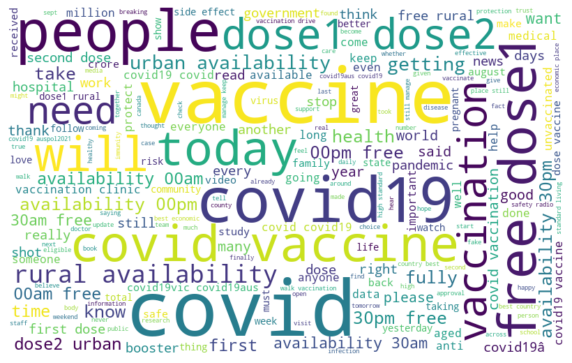

In [213]:
#plotting all words out of text
all_words = ' '.join([text for text in n_df['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


Text Classification using TextBlob

In [214]:
#The sentiment function of textblob returns two properties, polarity, and subjectivity. Polarity is float which lies in the range of [-1,1] where 1 means positive statement 
#and -1 means a negative statement.
#Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 
#Subjectivity is also a float which lies in the range of [0,1].
n_df['polarity'] = n_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
n_df['subjectivity'] = n_df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
n_df.head()

,user_verified,date,text,hashtags,tokenized,polarity,subjectivity
0,True,2021-09-06 23:55:48,please take covid seriously joke from,NaN,"[pleas, take, covid, serious, joke, from]",-0.333333,0.666667
1,False,2021-09-06 23:46:16,that more than risk from risk from vaccine pos...,CovidVaccine,"[that, more, than, risk, from, risk, from, vac...",0.250000,0.750000
2,False,2021-09-06 23:38:34,said anyone supporting blanket,FascistEmployerMandate FascistVaccinePass...,"[said, anyon, support, blanket]",0.250000,0.250000
3,False,2021-09-06 23:36:50,more crazy this time where medical doctor writ...,NaN,"[more, crazi, thi, time, where, medic, doctor,...",-0.033333,0.466667
4,False,2021-09-06 23:29:20,great point case about should take,CovidVaccine COVIDVaccination,"[great, point, case, about, should, take]",0.800000,0.750000


In [215]:
def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(cleaner(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [216]:
# We create a column with the result of the analysis:
n_df['sentiment'] = np.array([ analyze_sentiment(tweet) for tweet in n_df['text'] ])
n_df

,user_verified,date,text,hashtags,tokenized,polarity,subjectivity,sentiment
0,True,2021-09-06 23:55:48,please take covid seriously joke from,NaN,"[pleas, take, covid, serious, joke, from]",-0.333333,0.666667,-1
1,False,2021-09-06 23:46:16,that more than risk from risk from vaccine pos...,CovidVaccine,"[that, more, than, risk, from, risk, from, vac...",0.250000,0.750000,1
2,False,2021-09-06 23:38:34,said anyone supporting blanket,FascistEmployerMandate FascistVaccinePass...,"[said, anyon, support, blanket]",0.250000,0.250000,1
3,False,2021-09-06 23:36:50,more crazy this time where medical doctor writ...,NaN,"[more, crazi, thi, time, where, medic, doctor,...",-0.033333,0.466667,-1
4,False,2021-09-06 23:29:20,great point case about should take,CovidVaccine COVIDVaccination,"[great, point, case, about, should, take]",0.800000,0.750000,1
...,...,...,...,...,...,...,...,...
5674,False,2021-09-01 00:04:20,excellent summary where headed race after ever...,NaN,"[excel, summari, where, head, race, after, eve...",1.000000,1.000000,1
5675,False,2021-09-01 00:02:26,sweetening deal from through sept will give away,sweetening COVIDvaccine,"[sweeten, deal, from, through, sept, will, giv...",0.000000,0.000000,0
5676,False,2021-09-01 00:02:16,does work,CovidVaccine,"[doe, work]",0.000000,0.000000,0
5677,False,2021-09-01 00:00:41,excited soaring together again help stay toget...,NaN,"[excit, soar, togeth, again, help, stay, toget...",0.375000,0.750000,1


In [217]:
#n_df.to_csv('../Resources/labelled_tweets.csv',index=False)

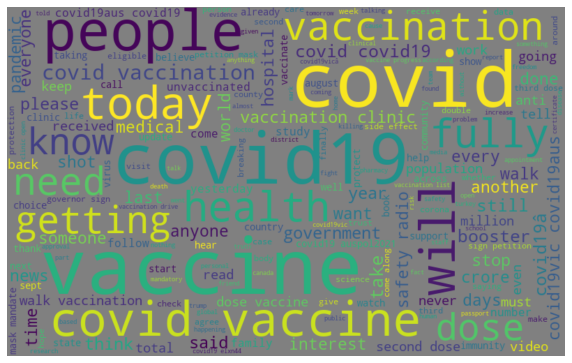

In [221]:
#plotting neutral words according to Textblob polarity classification
neu_words =' '.join([text for text in n_df['text'][n_df['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='grey').generate(neu_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

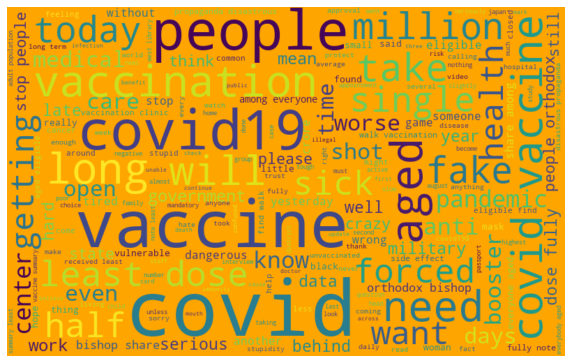

In [222]:
#plotting negative words
neg_words = ' '.join([text for text in n_df['text'][n_df['sentiment'] == -1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110, background_color='orange').generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

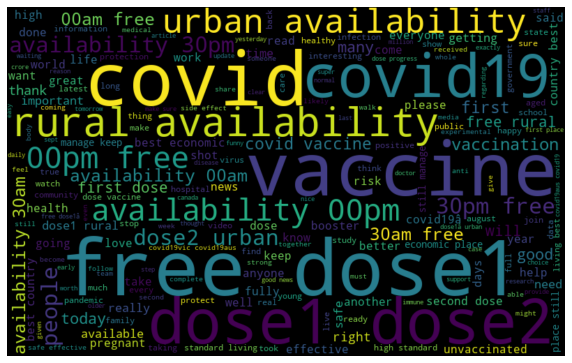

In [223]:
#plotting positive words 
pos_words = ' '.join([text for text in n_df['text'][n_df['sentiment'] > 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [239]:
import itertools
import collections
#count the most words shown up in pos_words
count_pos = collections.Counter(pos_words.split())
count_pos.most_common(15)

[('free', 465),
 ('availability', 417),
 ('vaccine', 330),
 ('covid', 316),
 ('dose1', 247),
 ('more', 223),
 ('this', 190),
 ('have', 185),
 ('covid19', 185),
 ('dose2', 183),
 ('first', 178),
 ('that', 170),
 ('dose', 154),
 ('your', 153),
 ('rural', 142)]

In [241]:
count_neg = collections.Counter(neg_words.split())
count_neg.most_common(15)

[('covid', 139),
 ('vaccine', 110),
 ('this', 89),
 ('have', 89),
 ('that', 77),
 ('with', 73),
 ('people', 73),
 ('your', 56),
 ('over', 54),
 ('covid19', 53),
 ('aged', 52),
 ('vaccination', 50),
 ('they', 49),
 ('about', 47),
 ('from', 42)]

In [242]:
count_neu = collections.Counter(neu_words.split())
count_neu.most_common(15)

[('covid', 561),
 ('vaccine', 493),
 ('covid19', 392),
 ('your', 273),
 ('vaccination', 255),
 ('this', 254),
 ('that', 244),
 ('with', 212),
 ('have', 207),
 ('from', 191),
 ('people', 164),
 ('dose', 149),
 ('they', 137),
 ('will', 127),
 ('about', 120)]

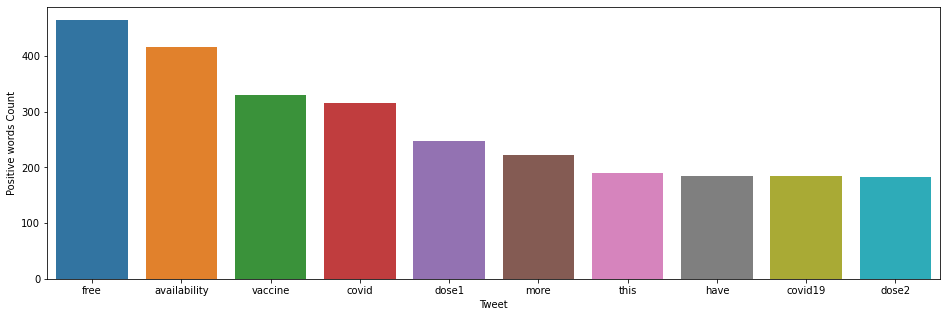

In [243]:
import seaborn as sns
a = nltk.FreqDist(count_pos)
d = pd.DataFrame({'Tweet': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent words    
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Tweet", y = "Count")
ax.set(ylabel = 'Positive words Count')
plt.show()

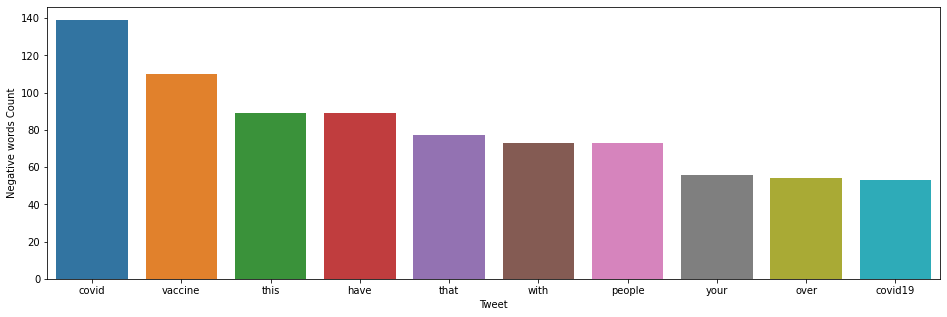

In [244]:
b = nltk.FreqDist(count_neg)
e = pd.DataFrame({'Tweet': list(b.keys()),
                  'Count': list(b.values())})
# selecting top 10 most frequent words    
e = e.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Tweet", y = "Count")
ax.set(ylabel = 'Negative words Count')
plt.show()

In [24]:
#tweet text cleaning option 2: 
def clean_tweet(temp):
    
    #for temp in range(0, len(n_df)) :
         #if type(temp) == float:
         #    return ""
         #else: 
            #print(temp)
    temp = temp.lower()
    temp = re.sub("'", "", str(temp)) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", str(temp))
    temp = re.sub("#[A-Za-z0-9_]+","", str(temp))
    temp = re.sub(r"www.\S+", "", temp)
    temp = re.sub(r"http\S+", "", temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp
n_df['text'] = n_df['text'].map(lambda x: clean_tweet(x))
n_df.head()

,user_verified,date,text,hashtags,tokenized,polarity,subjectivity,sentiment
0,True,2021-09-06 23:55:48,please take covid seriously joke,NaN,p l e a t a k e c o ...,-0.333333,0.666667,-1
1,False,2021-09-06 23:46:16,that more than risk risk vaccine possibly,CovidVaccine,t h a t m o r e t h ...,0.250000,0.750000,1
2,False,2021-09-06 23:38:34,said anyone supporting blanket,FascistEmployerMandate FascistVaccinePass...,s a i d a n y o n s ...,0.250000,0.250000,1
3,False,2021-09-06 23:36:50,more crazy this time where medical doctor writ...,NaN,m o r e c r a z i t ...,-0.033333,0.466667,-1
4,False,2021-09-06 23:29:20,great point case about should take,CovidVaccine COVIDVaccination,g r e a t p o i n t ...,0.800000,0.750000,1


In [25]:
#n_df.to_csv('../Resources/cleaned_tweets_train.csv',index=False)

In [29]:
SentimentText = n_df['text']
sentiment_text_list = SentimentText
textfile = open("../Resources/sentiment_text_list.txt", "w")
for element in sentiment_text_list:
    textfile.write(element + "\n")
textfile.close()


In [30]:
#https://github.com/adibyte95/Twittter-sentiment-analysis 

# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text( j, i, format(cm[i, j, ], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
#Vectorizer 1: Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

CountVectorizer is a tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. 
The value of each cell is nothing but the count of the word in that particular text sample.

In [128]:
# fitting the vectorizer
X=vectorizer.fit_transform(SentimentText)

In [129]:
# getting the target values i.e wheather the tweets are positive or negative
train_data = pd.read_csv('../Resources/labelled_tweets.csv')

y = train_data['sentiment']

In [130]:
y.shape

(5679,)

In [131]:
X.shape

(5679, 4200)

In [132]:
# splitting into training and testing set so as to evaluate the classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).Multinomial Naive Bayes algorithm is a *probabilistic* learning method that is mostly used in Natural Language Processing (NLP). ... Naive Bayes classifier is a collection of many algorithms where all the algorithms share one common principle, and that is each feature being classified is not related to any other feature.
If the feature vectors have n elements and each of them can assume k different values with probability pk, then:
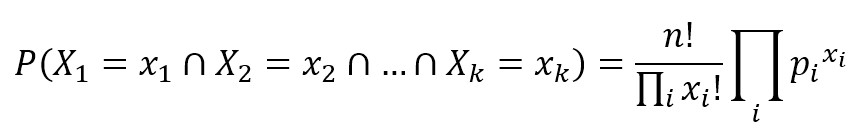

https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/

Multinomial Naive Bayes Explained: Function, Advantages & Disadvantages, Applications:
https://www.upgrad.com/blog/multinomial-naive-bayes-explained/

Multinomial Naive Bayes classification algorithm tends to be a baseline solution for sentiment analysis task. The basic idea of Naive Bayes technique is to find the probabilities of classes assigned to texts by using the joint probabilities of words and classes.

In [133]:
# fitting the multinomial bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [134]:
clf.score(X_train,y_train)

0.9339643407440018

In [135]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

0.8441901408450704

Confusion matrix, without normalization
[[ 69  41  17]
 [ 15 515  25]
 [ 18  61 375]]
Normalized confusion matrix
[[0.543 0.323 0.134]
 [0.027 0.928 0.045]
 [0.04  0.134 0.826]]


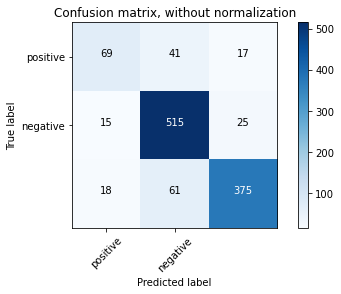

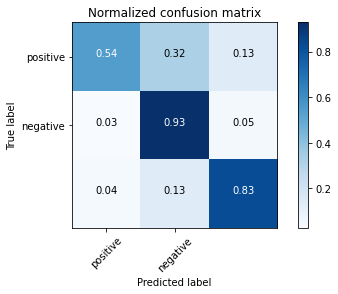

In [149]:
# Compute confusion matrix
import itertools    
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Scraping the most recent Twitter data via API Call for past a few days

In [56]:
import tweepy as tw
import config
from tqdm import tqdm
import os

In [57]:
consumer_api_key = config.consumer_key
consumer_api_secret = config.consumer_secret

In [58]:
auth = tw.OAuthHandler(consumer_api_key, consumer_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [59]:
search_words = "#covidvaccine -filter:retweets" 

date_since = "2021-09-03"
date_until="2021-09-10"
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since,
              until=date_until     
              ).items(7500)

In [60]:
tweets_copy = []
for tweet in tqdm(tweets):
    tweets_copy.append(tweet)

3025it [01:16, 39.41it/s]


In [61]:
print(f"New tweets retrieved: {len(tweets_copy)}")

New tweets retrieved: 3025


In [62]:
tweets_df = pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_created': tweet.user.created_at,
                                               'user_followers': tweet.user.followers_count,
                                               'user_friends': tweet.user.friends_count,
                                               'user_favourites': tweet.user.favourites_count,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': tweet.text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source,
                                               'is_retweet': tweet.retweeted}, index=[0]))
    

100%|██████████| 3025/3025 [00:13<00:00, 224.29it/s]


In [137]:
tweets_df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,THE COVID DYSTOPIA,,Covid is being used as a fear propaganda campa...,2019-06-02 14:50:35,148,42,3109,False,2021-09-09 23:59:50,This is all thanks to the majority complying a...,"[Covid_19, COVID19, COVID, Covid19UK]",Twitter for Android,False
0,Granny is vaxxed! ✌️💙🏳️‍🌈✊🏿,"Idaho, USA",Grandma has opinions and isn’t afraid to share...,2021-05-27 21:44:51,130,396,9351,False,2021-09-09 23:59:46,Check out Tommy's video! #CovidVaccine #Idaho...,"[CovidVaccine, Idaho, Mandates, TikTok]",Twitter for iPhone,False
0,#Don't get pregnant to begin with #TX,,Put Americans First Again #PAFA #MAGA #BuildTh...,2013-06-28 23:15:53,286,460,14628,False,2021-09-09 23:57:15,I haven't seen any doctors guaranteeing the #h...,"[health, futurebabies]",Twitter for Android,False
0,Bingo McGillicuddy,"Durant, OK",,2020-05-21 18:51:40,18,141,351,False,2021-09-09 23:57:15,10% vaccinated. 90% hypocrites! Don't let the...,[scientific],Twitter for Android,False
0,Steve,"VA, USA","I enjoy video games, pokemon, coins, and anime...",2010-03-30 04:09:39,140,286,2922,False,2021-09-09 23:56:46,Old info but still highly relevant to the #Cov...,"[Covid_19, SARSCoV2, CovidVaccine]",Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Indian Weekender,Auckland,NZ's #1 and the first weekly newspaper for Kiw...,2009-06-28 06:20:50,1374,1005,3139,False,2021-09-07 01:00:41,"In another milestone, India administered more ...",None,Buffer,False
0,Limey_In_The_US,,,2013-07-03 08:14:02,35,150,1637,False,2021-09-07 00:58:47,@AB81971 @TomiLahren It will be hard to get a ...,None,Twitter for Android,False
0,Amy,"Longview, TX","I am human, I have my own personal opinion on ...",2021-02-22 14:46:09,242,624,7913,False,2021-09-07 00:57:45,😳😱🤭WTF DID HE JUST SAY?! #BillGates #vaccinati...,"[BillGates, vaccination, CovidVaccine, NewWorl...",Twitter for iPhone,False
0,Roberta Henry,"Rogers, AR",#covidwars | #frontlineER Single mom | ER RN |...,2014-04-28 05:36:13,35,202,358,False,2021-09-07 00:56:30,Finally off work…but the echos of cries and of...,None,Twitter for iPhone,False


In [138]:
n_tweets_df = tweets_df.drop(columns = ['user_name', 'user_location','user_description','user_created',
                         'user_followers','user_friends','user_favourites','source','is_retweet'], axis = 1)
n_tweets_df.head()

,user_verified,date,text,hashtags
0,False,2021-09-09 23:59:50,This is all thanks to the majority complying a...,"[Covid_19, COVID19, COVID, Covid19UK]"
0,False,2021-09-09 23:59:46,Check out Tommy's video! #CovidVaccine #Idaho...,"[CovidVaccine, Idaho, Mandates, TikTok]"
0,False,2021-09-09 23:57:15,I haven't seen any doctors guaranteeing the #h...,"[health, futurebabies]"
0,False,2021-09-09 23:57:15,10% vaccinated. 90% hypocrites! Don't let the...,[scientific]
0,False,2021-09-09 23:56:46,Old info but still highly relevant to the #Cov...,"[Covid_19, SARSCoV2, CovidVaccine]"


In [139]:
#remove short words less than three letters 
n_tweets_df['text'] = n_tweets_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
#lower case all texts
n_tweets_df['text']=n_tweets_df["text"].str.lower()
n_tweets_df.head()


,user_verified,date,text,hashtags
0,False,2021-09-09 23:59:50,this thanks majority complying waking #covid_1...,"[Covid_19, COVID19, COVID, Covid19UK]"
0,False,2021-09-09 23:59:46,check tommy's video! #covidvaccine #idaho #man...,"[CovidVaccine, Idaho, Mandates, TikTok]"
0,False,2021-09-09 23:57:15,haven't seen doctors guaranteeing #health #fut...,"[health, futurebabies]"
0,False,2021-09-09 23:57:15,vaccinated. hypocrites! don't them same #scien...,[scientific]
0,False,2021-09-09 23:56:46,info still highly relevant #covid_19 #sarscov2...,"[Covid_19, SARSCoV2, CovidVaccine]"


In [140]:
n_tweets_df['text'] = n_tweets_df['text'].map(lambda x: clean_tweet(x))
n_tweets_df.head()

,user_verified,date,text,hashtags
0,False,2021-09-09 23:59:50,this thanks majority complying waking,"[Covid_19, COVID19, COVID, Covid19UK]"
0,False,2021-09-09 23:59:46,check tommys video,"[CovidVaccine, Idaho, Mandates, TikTok]"
0,False,2021-09-09 23:57:15,havent seen doctors guaranteeing born women,"[health, futurebabies]"
0,False,2021-09-09 23:57:15,vaccinated hypocrites dont them same principal...,[scientific]
0,False,2021-09-09 23:56:46,info still highly relevant late last year this...,"[Covid_19, SARSCoV2, CovidVaccine]"


In [141]:
n_tokenized_tweets = n_tweets_df['text'].apply(lambda x: x.split())


In [142]:
stemmer = PorterStemmer()

n_tokenized_tweets = n_tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
n_tokenized_tweets.head()
n_tweets_df['tokenized'] = n_tokenized_tweets

In [143]:
n_tweets_df['polarity'] = n_tweets_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
n_tweets_df['subjectivity'] = n_tweets_df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
n_tweets_df.head()

,user_verified,date,text,hashtags,tokenized,polarity,subjectivity
0,False,2021-09-09 23:59:50,this thanks majority complying waking,"[Covid_19, COVID19, COVID, Covid19UK]","[thi, thank, major, compli, wake]",0.200000,0.200000
0,False,2021-09-09 23:59:46,check tommys video,"[CovidVaccine, Idaho, Mandates, TikTok]","[check, tommi, video]",0.000000,0.000000
0,False,2021-09-09 23:57:15,havent seen doctors guaranteeing born women,"[health, futurebabies]","[havent, seen, doctor, guarante, born, women]",0.000000,0.000000
0,False,2021-09-09 23:57:15,vaccinated hypocrites dont them same principal...,[scientific],"[vaccin, hypocrit, dont, them, same, princip, ...",0.000000,0.125000
0,False,2021-09-09 23:56:46,info still highly relevant late last year this...,"[Covid_19, SARSCoV2, CovidVaccine]","[info, still, highli, relev, late, last, year,...",0.033333,0.522222


In [144]:
n_tweets_df['sentiment'] = np.array([ analyze_sentiment(tweet) for tweet in n_tweets_df['text'] ])
n_tweets_df

,user_verified,date,text,hashtags,tokenized,polarity,subjectivity,sentiment
0,False,2021-09-09 23:59:50,this thanks majority complying waking,"[Covid_19, COVID19, COVID, Covid19UK]","[thi, thank, major, compli, wake]",0.200000,0.200000,1
0,False,2021-09-09 23:59:46,check tommys video,"[CovidVaccine, Idaho, Mandates, TikTok]","[check, tommi, video]",0.000000,0.000000,0
0,False,2021-09-09 23:57:15,havent seen doctors guaranteeing born women,"[health, futurebabies]","[havent, seen, doctor, guarante, born, women]",0.000000,0.000000,0
0,False,2021-09-09 23:57:15,vaccinated hypocrites dont them same principal...,[scientific],"[vaccin, hypocrit, dont, them, same, princip, ...",0.000000,0.125000,0
0,False,2021-09-09 23:56:46,info still highly relevant late last year this...,"[Covid_19, SARSCoV2, CovidVaccine]","[info, still, highli, relev, late, last, year,...",0.033333,0.522222,1
...,...,...,...,...,...,...,...,...
0,False,2021-09-07 01:00:41,another milestone india administered more covi...,None,"[anoth, mileston, india, administ, more, covid...",0.500000,0.500000,1
0,False,2021-09-07 00:58:47,will hard with agency without taking jab too t...,None,"[will, hard, with, agenc, without, take, jab, ...",-0.291667,0.541667,-1
0,False,2021-09-07 00:57:45,wtf just say,"[BillGates, vaccination, CovidVaccine, NewWorl...","[wtf, just, say]",-0.500000,1.000000,0
0,False,2021-09-07 00:56:30,finally work but echos cries sorrow seem dwell...,None,"[final, work, but, echo, cri, sorrow, seem, dw...",0.000000,1.000000,0


In [145]:
X=vectorizer.fit_transform(SentimentText)
test_data = n_tweets_df
y= n_tweets_df['sentiment']

In [146]:
X.shape

(5679, 4200)

In [147]:
y.shape

(3025,)

In [ ]:
# splitting into training and testing set so as to evaluate the classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [150]:
# fitting the multinomial bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [151]:
clf.score(X_train,y_train)

0.9339643407440018

In [152]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

0.8441901408450704

Confusion matrix, without normalization
[[ 69  41  17]
 [ 15 515  25]
 [ 18  61 375]]
Normalized confusion matrix
[[0.543 0.323 0.134]
 [0.027 0.928 0.045]
 [0.04  0.134 0.826]]


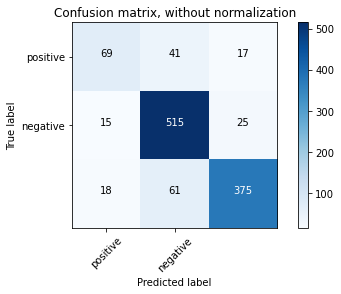

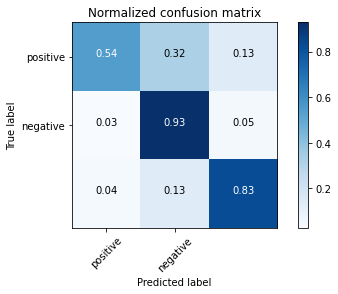

In [153]:
# Compute confusion matrix
import itertools    
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()